In [16]:
from pathlib import Path
import torch
import matplotlib.pyplot as plt
plt.rcParams["savefig.bbox"] = 'tight'

from torchvision.transforms import v2, InterpolationMode
from torchvision.io import read_image

torch.manual_seed(1)

train_transforms = v2.Compose([
    v2.Grayscale(1),
    v2.RandomErasing(scale=(0.01, 0.1)),
    v2.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.9, 1.1), interpolation=InterpolationMode.BILINEAR),
    v2.RandomApply([v2.GaussianBlur(kernel_size=(5, 5))]),
    v2.ColorJitter(brightness=.1, contrast=.1),
    v2.Resize(size=(224, 224), antialias=True)
])
test_transforms = v2.Compose([
    v2.Grayscale(1),
    v2.Resize(size=(224, 224), antialias=True)
])

from src.helpers import plot
img = read_image(str(Path('data/image') / 'AA00001101806095635_v2.png'))
print(f"{type(img) = }, {img.dtype = }, {img.shape = }")

type(img) = <class 'torch.Tensor'>, img.dtype = torch.uint8, img.shape = torch.Size([1, 512, 512])


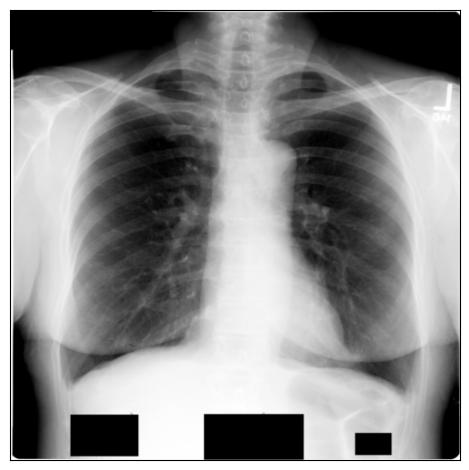

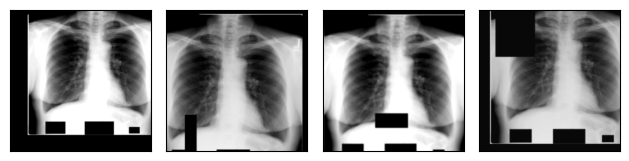

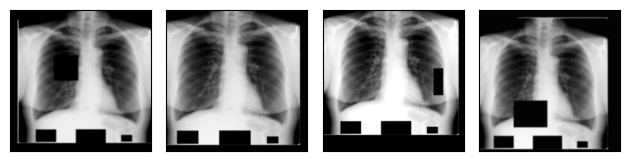

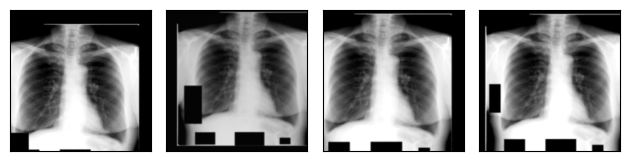

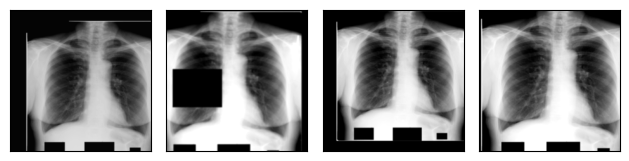

In [18]:
plot([img], cmap="gray", vmin=0, vmax=255)
for i in range(4):
    plot([train_transforms(img) for i in range(4)], cmap="gray", vmin=0, vmax=255)